In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set a nice visual style for our plots
sns.set_style('whitegrid')

# Load the dataset from your project folder
df = pd.read_csv('insurance.csv')

# Show the first 5 rows to see what it looks like
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


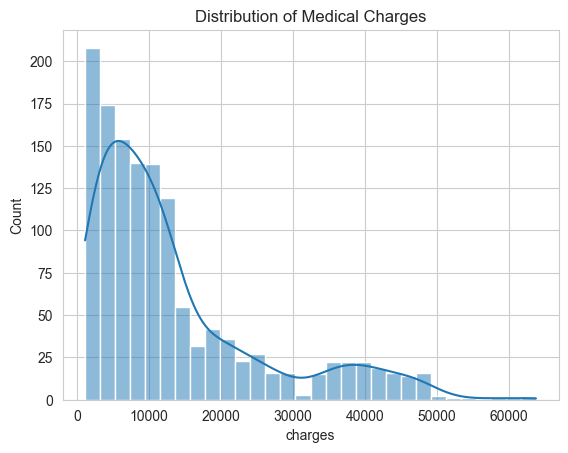

In [3]:
# Plot a histogram of the 'charges' column
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.show()

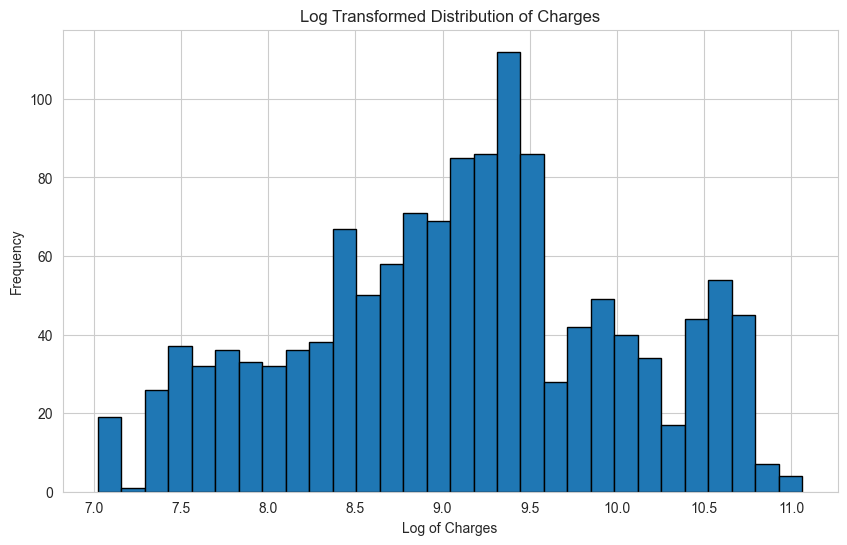

In [7]:
# Apply log transformation to 'charges'
df['log_charges'] = np.log(df['charges'])

# Plot the transformed distribution
plt.figure(figsize=(10, 6))
df['log_charges'].hist(bins=30, edgecolor='black')
plt.title('Log Transformed Distribution of Charges')
plt.xlabel('Log of Charges')
plt.ylabel('Frequency')
plt.show()

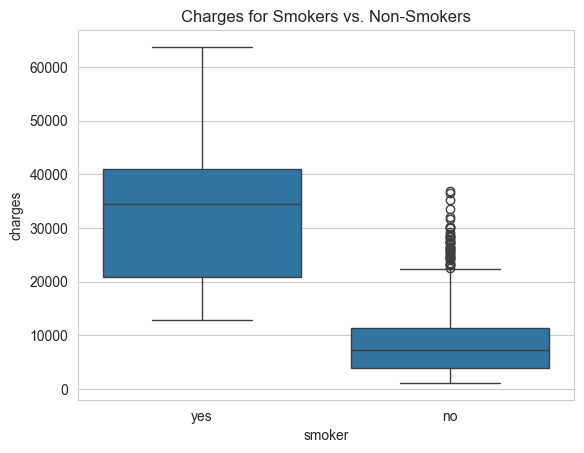

In [4]:
# Create a boxplot to compare charges for smokers vs. non-smokers
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges for Smokers vs. Non-Smokers')
plt.show()

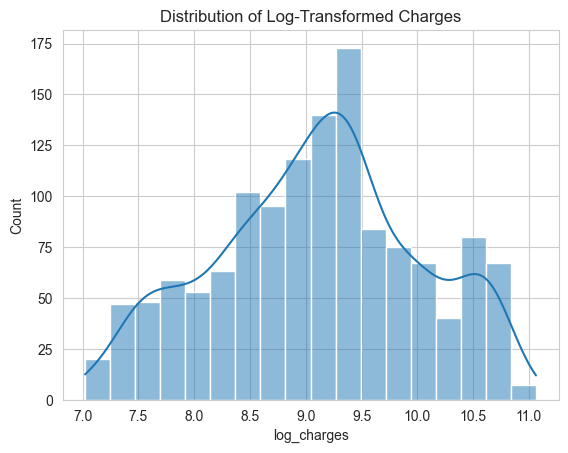

In [5]:
# Create a new column 'log_charges'
# We use np.log() (from the NumPy library)
df['log_charges'] = np.log(df['charges'])

# Now, plot a histogram of this new column
sns.histplot(df['log_charges'], kde=True)
plt.title('Distribution of Log-Transformed Charges')
plt.show()

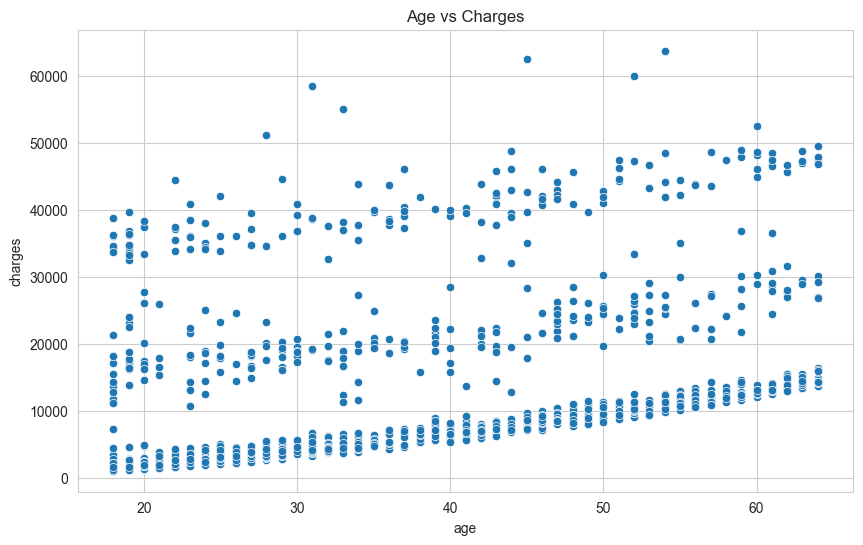

In [8]:
# Scatter plot of 'age' vs 'charges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

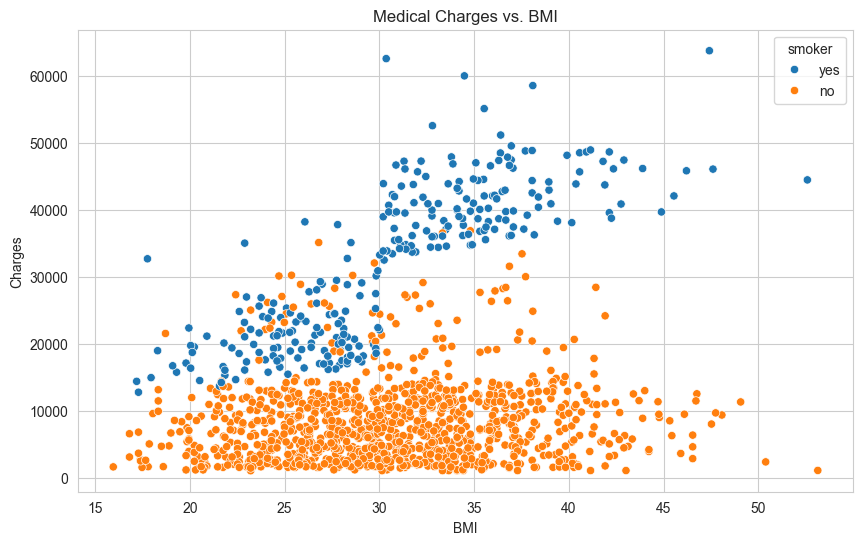

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Medical Charges vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

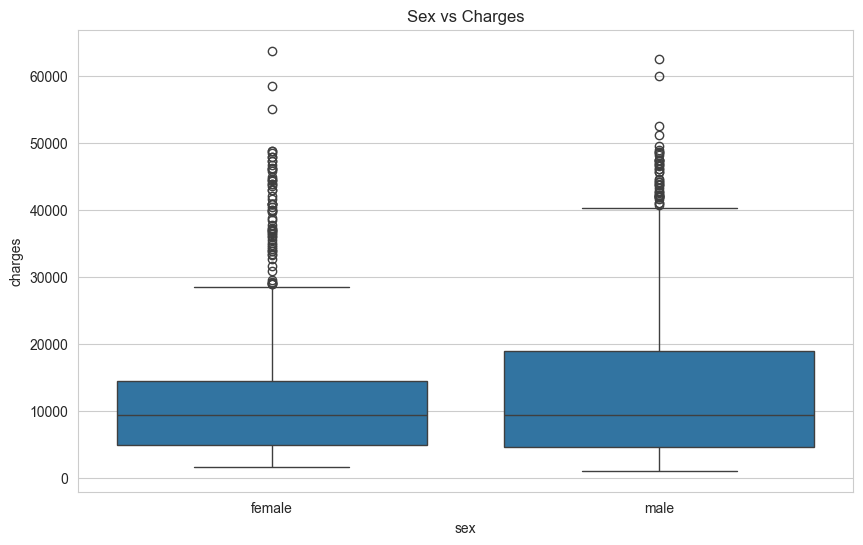

In [9]:
# Boxplot of 'sex' vs 'charges'
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')
plt.show()

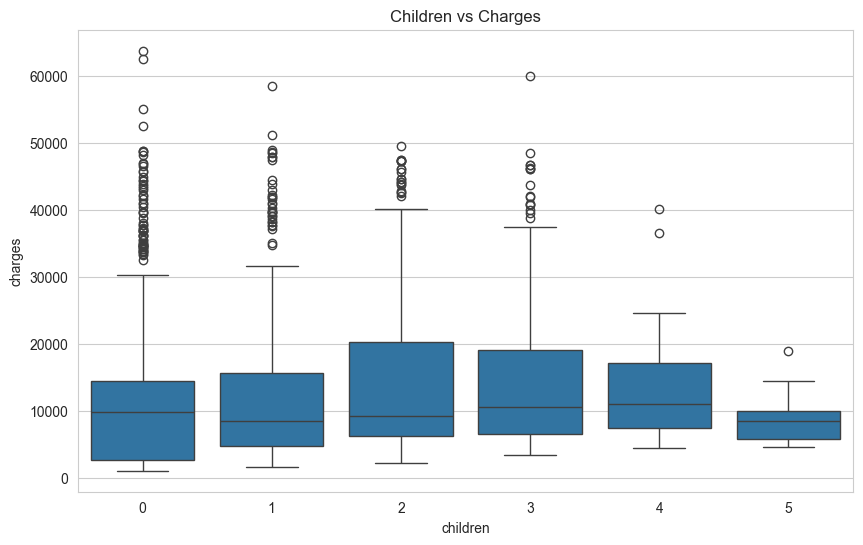

In [10]:
# Boxplot of 'children' vs 'charges'
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')
plt.show()

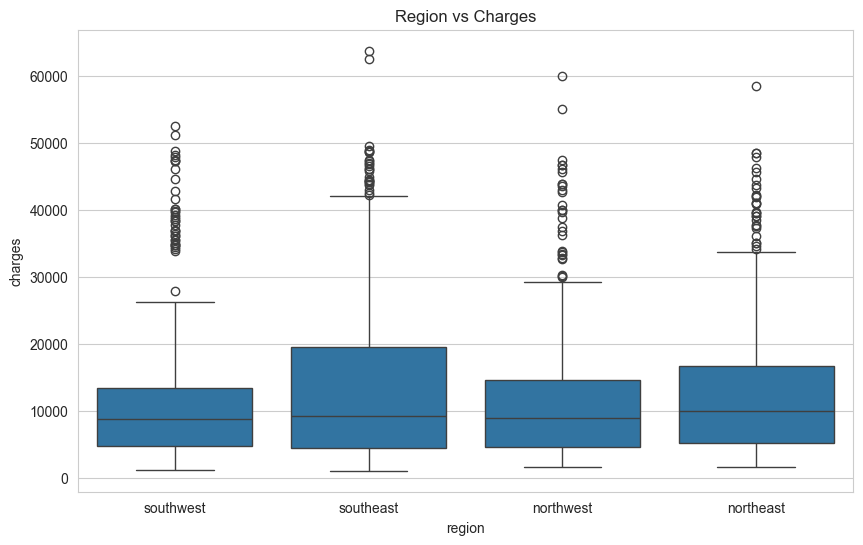

In [11]:
# Boxplot of 'region' vs 'charges'
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')
plt.show()

### Key Insights from EDA:

1. **Log Transformation**: The 'charges' variable was highly skewed. After applying np.log(), the distribution became more normal, which is beneficial for modeling.
2. **Smoker**: Smoking is a key predictor. Smokers tend to have higher medical costs.
3. **Age and BMI**: Both age and BMI show a positive correlation with medical costs. As these increase, charges tend to increase as well.
4. **Sex and Region**: Gender and region do not show strong effects on medical costs but are still worth exploring further in the model.
5. **Children**: More children seem to correlate with higher charges, though the effect is less pronounced than smoking and age.


In [12]:
# Define features and target
X = df[['age', 'bmi', 'children', 'smoker', 'sex', 'region']]  # Features
y = df['log_charges']  # Target (log-transformed charges)


In [14]:
# One-hot encode categorical variables (smoker, sex, region)
X = pd.get_dummies(X, drop_first=True)


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R²
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R²: {r2}')


Mean Squared Error: 0.17557416396791645
Root Mean Squared Error: 0.41901570849780373
R²: 0.8047311493462987


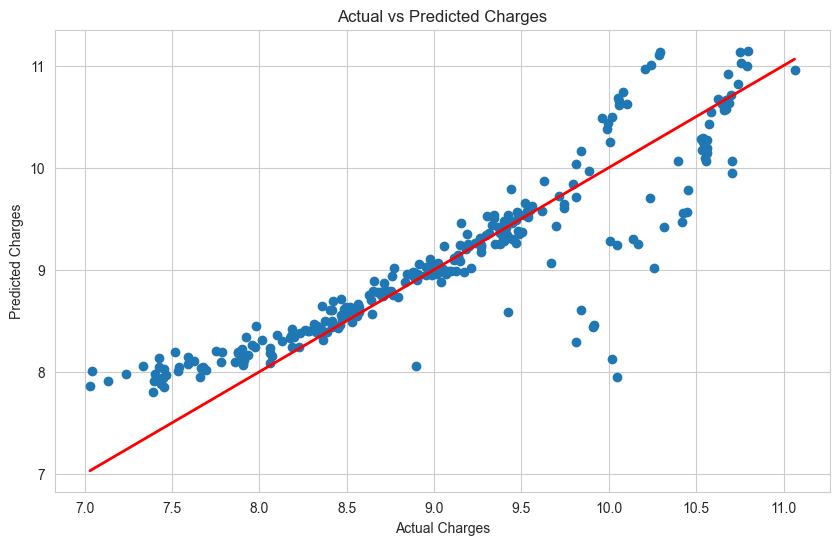

In [19]:
# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()
